<a href="https://colab.research.google.com/github/miguel-garces/stratigraphy/blob/main/Paleocurrent_analysis_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paleocurrent data analysis 

In [1]:
#importing modules
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [2]:
# defining statistical functions

# polar mean function
def polar_mean(x):
  cos_a = 0
  sin_a = 0
  for a in x:                         #loop to sum the sinus and cosinus of all directional data
    cos_a += np.cos(np.radians(a))
    sin_a += np.sin(np.radians(a))
  mean = np.degrees(np.arctan2(sin_a,cos_a))    # calculates the mean from arctang of the the sum of sinus and cosinus
  return(mean)


# Standard deviation function
def standard_deviation(x,x_mean):
    sum_squared_diferences = 0
    for a in x:                       #loop to calculate the squared difference of the individual directions to the mean
        squared_diferences = (2*np.degrees(np.arcsin(np.sqrt(
            (np.cos(np.radians(a))-np.cos(np.radians(x_mean)))**2+
            (np.sin(np.radians(a))-np.sin(np.radians(x_mean)))**2)
            /2)))**2
        sum_squared_diferences += squared_diferences    #summatory of squared differences
    std_dev = np.sqrt(sum_squared_diferences/len(x))    # standard deviation= squared root of summatory divided by number of data
    return(std_dev)
    

In [3]:
# importing data files from local directory

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) # fn = file name

#read data from excel file and store it in dataframe
filename = fn
xls = pd.ExcelFile(filename)
data = xls.parse(0) #first sheet (0) of the excel file parsed to variable
data.info() # show data file

Saving paleocorrents_ex1_set2.xls to paleocorrents_ex1_set2.xls
User uploaded file "paleocorrents_ex1_set2.xls" with length 42496 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   foresets  106 non-null    int64  
 1   flutes    38 non-null     float64
 2   grooves   29 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.6 KB


Choose column from dataframe

In [4]:
option = {1: data.columns[0], 2: data.columns[1], 3: data.columns[2]}
#option = {1: 'foresets', 2: 'flutes', 3: 'grooves'}
print(option)
#print("1: ", data.columns[0],"  2: ", data.columns[1],"  3: ", data.columns[2])
column_number = int(input("choose data column:  "))

selected_data = data[option[column_number]].dropna()

{1: 'foresets', 2: 'flutes', 3: 'grooves'}
choose data column:  3


**Calculate statistics**

In [5]:
#Calculate mean direction and standard error
paleocurrent_mean = polar_mean(selected_data)
paleocurrent_std_dev = standard_deviation(selected_data,paleocurrent_mean)

print("The dataset contains ", len(selected_data), option[column_number])
print('The mean of', option[column_number], 'is:', int(paleocurrent_mean))
print('The standard deviation of', option[column_number], 'is:', "{:.2f}".format(paleocurrent_std_dev))    


The dataset contains  29 grooves
The mean of grooves is: 41
The standard deviation of grooves is: 7.81


**Plotting Rose diagram**

**Set the number of bins**

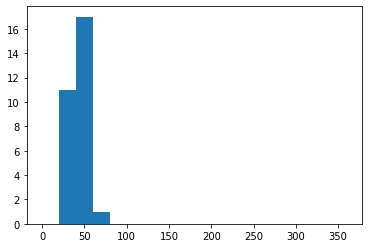

In [6]:
#set manually the number of bins. The frequency (radius), azimuth of bins and and angular_width of bins is calculated
number_of_bins = 18   #set number of bins manually

bin_shapes = plt.hist(selected_data, bins = number_of_bins, range = (0,360))

#setting values for rose diagram
frequency = bin_shapes[0] #frequency of each bin
azimuth = []  #array of azimuths of bins
for n in range(len(bin_shapes[1])-1):
  azimuth.append((bin_shapes[1][n]+bin_shapes[1][n+1])/2)
angular_width = (azimuth[-1]-azimuth[0])/(len(azimuth)-1) #angular width of bins

In [7]:
# Plotting rose diagram
fig = go.Figure(go.Barpolar(
    r=frequency,
    theta=azimuth,
    width=angular_width,
    marker_color= "blue",
    marker_line_color="black",
    marker_line_width=1,
    opacity=0.8
))

fig.update_layout(
    template=None,
    polar = dict(
        radialaxis = dict(range=[0, frequency.max()], showticklabels= True, ticks=''),
        angularaxis = dict(showticklabels= True, ticks='',
        tickfont_size = 10,
        rotation = 90,
        direction = "clockwise")
    )
)
fig.show()